# Notebook for simulating an average down stock/etf trading strategy

#### Disclaimer: The author of this code/analysis is not resposible for those who risk their money trying this strategy. There is inherent risk to participating in the stock market despite this technical analysis. As a general rule, one should only trade/invest with money that one can afford to lose. 
#### Author: Evan Tsiklidis

# Premise: Average down on blue chip stocks and compare with the hold strategy. Code is meant to answer the following questions. 
#### 1. When should we average down?
#### 2. How much should we purchase when we average down? 

## Summary: More work to be done here, but this could be a profitable strategy! 

#### Averaging down / selling a portion if/when the stock rises to break even in this method has the following advantages: 
#### 1. Provides protection against larger decline. 
#### 2. Takes advantage of natural market volatility. 
#### 3. Since we are selling shares in a first-in-first-out manner, we will frequently be selling loser stocks for a loss and keeping the ones at a lower cost basis which has numerous tax benefits. 

# Risks: 
#### 1. This strategy is based on the assumption that blue-chip stocks will not monotonically decline. Generally speaking, stocks will drop but may also increase in value briefly as traders/investers attempt to "buy-the-dip". However, there is requirement guaranteeing this will happen: just what tends to happen to stocks in the market. 

In [36]:
#import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import date, timedelta
from trading_strats import StockEvaluations
from tqdm import tqdm
import os
from ydata_profiling import ProfileReport
import seaborn as sns

In [37]:
stock = StockEvaluations(ticker='TSLA',num_days=365,num_chunks=5,percent_cutoff=-2)
stock.getStockData()
stock.simulateAvgDownStrat()

['TSLA', 365, 5, -2, 4.3, -13.68]

In [38]:
stock = StockEvaluations(ticker='AMZN',num_days=365,num_chunks=5,percent_cutoff=-2)
stock.getStockData()
stock.simulateAvgDownStrat()

['AMZN', 365, 5, -2, 15.44, 12.64]

In [39]:
stock = StockEvaluations(ticker='BBBYQ',num_days=365,num_chunks=5,percent_cutoff=-5)
stock.getStockData()
stock.simulateAvgDownStrat()

['BBBYQ', 365, 5, -5, -96.81, -97.5]

In [40]:
stock = StockEvaluations(ticker='PFE',num_days=365,num_chunks=5,percent_cutoff=-5)
stock.getStockData()
stock.simulateAvgDownStrat()

['PFE', 365, 5, -5, -4.82, -24.08]

In [41]:
if 'stockStratData.csv' in os.listdir(os.getcwd()+'/sim_results'): 
    df = pd.read_csv(os.getcwd() + '/sim_results/stockStratData.csv').drop(['Unnamed: 0'],axis=1)
else: 
    #Main simulator, used for generating data that will be evaluated below. 
    stock_list = ['AMZN','TSLA','QQQ','MRK','BAC','CAT','CVX','GM','JPM','KO','MRK','AAPL']
    num_days_list = [i * 360 for i in range(1,10)]
    num_chunks_list = [i for i in range(1,10)]
    percent_cutoff_list = [-5,-4,-3,-2,-1]

    data = []

    for ticker in tqdm(stock_list): 
        for num_days in num_days_list: 
            for num_chunks in num_chunks_list: 
                for percent_cutoff in percent_cutoff_list: 

                    stock = StockEvaluations(ticker=ticker,num_days=num_days,num_chunks=num_chunks,percent_cutoff=percent_cutoff)
                    stock.getStockData()
                    results = stock.simulateAvgDownStrat()       
                    data.append(results)
    df = pd.DataFrame(data,columns = ['Ticker','Num_Days','Num_Chunks','Cutoff','Strategy','Buy_and_hold'])
df.head()

Ticker  Num_Days  Num_Chunks  Cutoff  Strategy  Buy_and_hold
0   AMZN       360           1      -5     21.56         21.56
1   AMZN       360           1      -4     21.56         21.56
2   AMZN       360           1      -3     21.56         21.56
3   AMZN       360           1      -2     21.56         21.56
4   AMZN       360           1      -1     21.56         21.56

## Data Analysis from all in-silico experimentation of our strategy will be contined below.

In [42]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
grouped_df = df[['Num_Chunks','Cutoff','Strategy']].groupby(['Num_Chunks','Cutoff']).mean().reset_index()
grouped_df.head(10)

Num_Chunks  Cutoff    Strategy
0           1      -5  170.792222
1           1      -4  170.792222
2           1      -3  170.792222
3           1      -2  170.792222
4           1      -1  170.792222
5           2      -5   90.157963
6           2      -4   90.746574
7           2      -3   91.271111
8           2      -2   92.720093
9           2      -1   93.295278

In [44]:
pivot_df = grouped_df.pivot('Num_Chunks','Cutoff')#.reset_index(drop=True)#.reset_index(drop=True)
pivot_df

Strategy                                                
Cutoff              -5          -4          -3          -2          -1
Num_Chunks                                                            
1           170.792222  170.792222  170.792222  170.792222  170.792222
2            90.157963   90.746574   91.271111   92.720093   93.295278
3            60.352500   61.342130   62.646481   63.700093   63.839352
4            46.000926   47.196204   47.912963   48.886481   49.919907
5            36.863056   37.698981   38.853241   39.645093   40.468426
6            30.734444   31.537963   32.396481   33.185648   33.833426
7            26.321574   27.045648   27.841019   28.553889   29.172315
8            23.086574   23.820926   24.439630   25.498796   26.051759
9            20.488056   21.185370   21.755185   22.759259   23.162037

<AxesSubplot:xlabel='None-Cutoff', ylabel='Num_Chunks'>

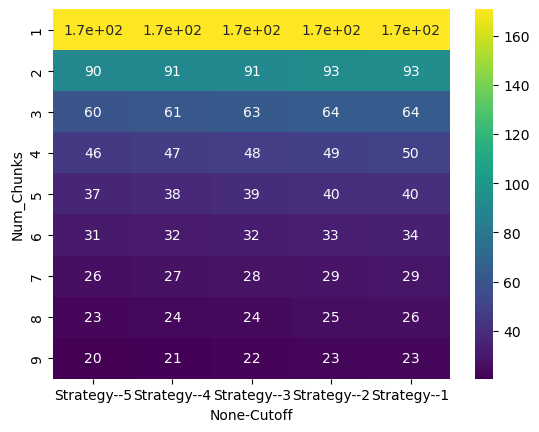

In [11]:
sns.heatmap(pivot_df, annot=True,cmap='viridis')

## Let's take a closer look at situations where the average down strategy wins

In [48]:
stratWins = df[df['Strategy'] > df['Buy_and_hold']]
stratWins.head()

Ticker  Num_Days  Num_Chunks  Cutoff  Strategy  Buy_and_hold
5    AMZN       360           2      -5     23.42         21.56
6    AMZN       360           2      -4     23.42         21.56
7    AMZN       360           2      -3     21.90         21.56
8    AMZN       360           2      -2     22.99         21.56
50   AMZN       720           2      -5     20.33        -15.19

In [51]:
df.shape

(4860, 6)

In [50]:
stratWins.shape

(775, 6)

In [52]:
df[df['Num_Chunks'] == 3].shape

(540, 6)

In [53]:
stratWins[stratWins['Num_Chunks'] == 3].shape

(99, 6)

In [54]:
stratWins[stratWins['Num_Chunks'] == 2].shape

(114, 6)

In [55]:
df[df['Num_Chunks'] == 2].shape

(540, 6)

In [56]:
stratWins.Num_Days.mean()

1329.909677419355

In [57]:
df[df['Strategy'] < df['Buy_and_hold']].Num_Days.mean()

1902.7700987306064

In [13]:
profile = ProfileReport(stratWins, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
grouped_df = stratWins[['Num_Chunks','Cutoff','Strategy']].groupby(['Num_Chunks','Cutoff']).mean().reset_index()
grouped_df.head(10)

Num_Chunks  Cutoff   Strategy
0           2      -5  13.914348
1           2      -4  10.147619
2           2      -3   8.318261
3           2      -2  11.728800
4           2      -1   8.241818
5           3      -5   6.585556
6           3      -4   9.321500
7           3      -3   9.198571
8           3      -2  10.417500
9           3      -1   8.602000

In [46]:
pivot_df = grouped_df.head(10).pivot('Num_Chunks','Cutoff')#.reset_index(drop=True)#.reset_index(drop=True)
pivot_df

Strategy                                        
Cutoff             -5         -4        -3       -2        -1
Num_Chunks                                                   
2           13.914348  10.147619  8.318261  11.7288  8.241818
3            6.585556   9.321500  9.198571  10.4175  8.602000

<AxesSubplot:xlabel='None-Cutoff', ylabel='Num_Chunks'>

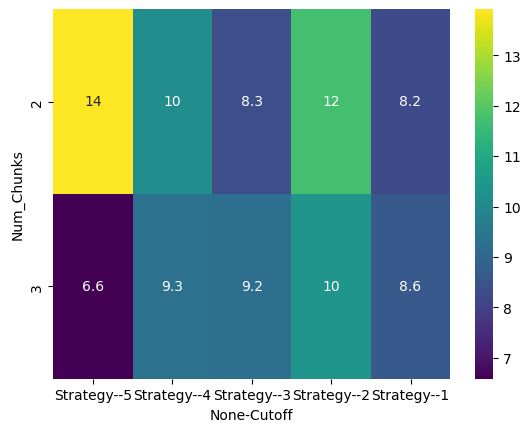

In [47]:
sns.heatmap(pivot_df, annot=True,cmap='viridis')

## What about when the strategy loses? 

In [18]:
stratLoses = df[df['Strategy'] < df['Buy_and_hold']]
stratLoses.head()

Ticker  Num_Days  Num_Chunks  Cutoff  Strategy  Buy_and_hold
9    AMZN       360           2      -1     15.68         21.56
10   AMZN       360           3      -5     17.20         21.56
11   AMZN       360           3      -4     17.40         21.56
12   AMZN       360           3      -3     21.40         21.56
13   AMZN       360           3      -2     20.75         21.56

In [19]:
stratLoses.describe()

Num_Days   Num_Chunks       Cutoff     Strategy  Buy_and_hold
count  3545.000000  3545.000000  3545.000000  3545.000000   3545.000000
mean   1902.770099     5.537941    -3.013540    51.094657    209.482858
std     911.006996     2.288894     1.416143   105.372950    389.059801
min     360.000000     2.000000    -5.000000     0.080000      0.740000
25%    1080.000000     4.000000    -4.000000     9.510000     39.090000
50%    1800.000000     6.000000    -3.000000    18.290000     72.010000
75%    2520.000000     8.000000    -2.000000    38.670000    149.250000
max    3240.000000     9.000000    -1.000000   939.330000   1866.590000

In [20]:
stratWins.describe()

Num_Days  Num_Chunks      Cutoff    Strategy  Buy_and_hold
count   775.000000  775.000000  775.000000  775.000000    775.000000
mean   1329.909677    5.326452   -2.938065    8.257058     -6.186232
std     867.508754    2.297175    1.405520    9.945009     13.599023
min     360.000000    2.000000   -5.000000  -34.370000    -37.010000
25%     720.000000    3.000000   -4.000000    3.825000    -12.490000
50%    1080.000000    5.000000   -3.000000    8.470000     -3.890000
75%    1800.000000    7.000000   -2.000000   13.285000      3.170000
max    3240.000000    9.000000   -1.000000   52.090000     43.000000

In [21]:
pivot_df = stratLoses[['Num_Chunks','Cutoff','Strategy']].groupby(['Num_Chunks','Cutoff']).mean().reset_index()
pivot_df.head(10)

Num_Chunks  Cutoff    Strategy
0           2      -5  110.788588
1           2      -4  110.201494
2           2      -3  113.717176
3           2      -2  117.115060
4           2      -1  115.053140
5           3      -5   71.105889
6           3      -4   73.165000
7           3      -3   75.547701
8           3      -2   75.809773
9           3      -1   76.393295

In [22]:
pivot_df = pivot_df.pivot('Num_Chunks','Cutoff')#.reset_index(drop=True)#.reset_index(drop=True)
pivot_df

Strategy                                                
Cutoff              -5          -4          -3          -2          -1
Num_Chunks                                                            
2           110.788588  110.201494  113.717176  117.115060  115.053140
3            71.105889   73.165000   75.547701   75.809773   76.393295
4            53.746444   55.257753   57.252874   58.255977   59.227586
5            42.964333   44.047640   45.932874   46.544773   47.204886
6            35.800111   36.788315   37.990682   38.410899   39.702500
7            30.405275   30.937143   32.605909   32.947079   34.152955
8            26.404783   27.069341   27.992333   28.693778   30.117955
9            23.470870   23.891522   24.700989   25.540000   26.523820

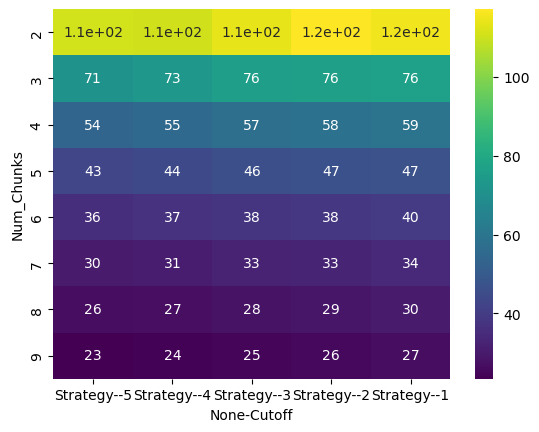

In [23]:
sns.heatmap(pivot_df, annot=True,cmap='viridis')
plt.show()

In [24]:
#df.corr()

In [25]:
#strat_wins = df[df['Strategy'] > df['Buy_and_hold']]
#strat_wins.head(100)

In [26]:
#df[['Cutoff','Num_Chunks','Strategy',]].groupby(['Cutoff','Num_Chunks']).mean().reset_index()

In [27]:
#strat_wins[['Cutoff','Num_Chunks','Strategy',]].groupby(['Cutoff','Num_Chunks']).mean().reset_index()

In [28]:
#strat_wins[['Cutoff','Strategy',]].groupby(['Cutoff']).mean().reset_index()

In [29]:
#df[['Cutoff','Strategy',]].groupby(['Cutoff']).mean().reset_index()

In [30]:
#short_term = df[df['Num_Days'] < 1081]
#short_term[['Cutoff','Strategy',]].groupby(['Cutoff']).mean().reset_index()

In [31]:
#short_term[['Num_Chunks','Strategy',]].groupby(['Num_Chunks']).mean().reset_index()

In [32]:
#strat_wins.Ticker.value_counts()

In [33]:
#strat_wins.describe()

In [34]:
#strat_loses = df[df['Strategy'] < df['Buy_and_hold']]
#strat_loses.head()

In [35]:
#strat_loses.describe()